In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')  

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dataframe = pd.read_csv(url, usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [4]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - 12ms/step - loss: 0.0380
Epoch 2/100
94/94 - 0s - 1ms/step - loss: 0.0183
Epoch 3/100
94/94 - 0s - 1ms/step - loss: 0.0142
Epoch 4/100
94/94 - 0s - 1ms/step - loss: 0.0132
Epoch 5/100
94/94 - 0s - 1ms/step - loss: 0.0123
Epoch 6/100
94/94 - 0s - 1ms/step - loss: 0.0115
Epoch 7/100
94/94 - 0s - 1ms/step - loss: 0.0107
Epoch 8/100
94/94 - 0s - 1ms/step - loss: 0.0097
Epoch 9/100
94/94 - 0s - 1ms/step - loss: 0.0088
Epoch 10/100
94/94 - 0s - 1ms/step - loss: 0.0079
Epoch 11/100
94/94 - 0s - 1ms/step - loss: 0.0070
Epoch 12/100
94/94 - 0s - 1ms/step - loss: 0.0062
Epoch 13/100
94/94 - 0s - 1ms/step - loss: 0.0054
Epoch 14/100
94/94 - 0s - 1ms/step - loss: 0.0047
Epoch 15/100
94/94 - 0s - 1ms/step - loss: 0.0040
Epoch 16/100
94/94 - 0s - 1ms/step - loss: 0.0035
Epoch 17/100
94/94 - 0s - 1ms/step - loss: 0.0031
Epoch 18/100
94/94 - 0s - 1ms/step - loss: 0.0027
Epoch 19/100
94/94 - 0s - 1ms/step - loss: 0.0025
Epoch 20/100
94/94 - 0s - 1ms/step - loss: 0.0023
Epoch 21

In [9]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [10]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.69 RMSE
Test Score: 49.33 RMSE


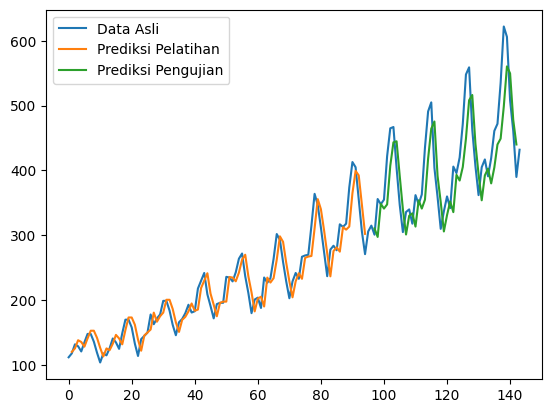

In [11]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset), label='Data Asli')
plt.plot(trainPredictPlot, label='Prediksi Pelatihan')
plt.plot(testPredictPlot, label='Prediksi Pengujian')
plt.legend()
plt.show()